***Predictive Model for future Price Forcasting and Market Analysis.***

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

***Read the Data***

In [28]:
m=pd.read_csv('/content/Toyota_Data.csv')
m

,Date,Adj Close,Close,High,Low,Open,Volume
0,3/17/1980,2.296798,3.291227,3.344743,3.291227,0.000000,41109
1,3/18/1980,2.306134,3.304606,3.358122,3.304606,0.000000,9343
2,3/19/1980,2.306134,3.304606,3.304606,3.304606,3.304606,0
3,3/20/1980,2.306134,3.304606,3.358122,3.304606,0.000000,10277
4,3/21/1980,2.362154,3.384880,3.438396,3.384880,0.000000,8409
...,...,...,...,...,...,...,...
11286,12/20/2024,178.169998,178.169998,179.919998,175.839996,175.839996,425700
11287,12/23/2024,180.449997,180.449997,180.619995,177.970001,179.119995,422700
11288,12/24/2024,181.429993,181.429993,181.720001,180.830002,181.000000,168600
11289,12/26/2024,197.360001,197.360001,198.000000,193.130005,195.970001,1281200


In [29]:
m.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,3/17/1980,2.296798,3.291227,3.344743,3.291227,0.000000,41109
1,3/18/1980,2.306134,3.304606,3.358122,3.304606,0.000000,9343
2,3/19/1980,2.306134,3.304606,3.304606,3.304606,3.304606,0
3,3/20/1980,2.306134,3.304606,3.358122,3.304606,0.000000,10277
4,3/21/1980,2.362154,3.384880,3.438396,3.384880,0.000000,8409


In [30]:
m.isnull().sum()

,0
Date,0
Adj Close,1
Close,0
High,2
Low,1
Open,0
Volume,0


***Data Structure***

In [31]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11291 entries, 0 to 11290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       11291 non-null  object 
 1   Adj Close  11290 non-null  float64
 2   Close      11291 non-null  float64
 3   High       11289 non-null  float64
 4   Low        11290 non-null  float64
 5   Open       11291 non-null  float64
 6   Volume     11291 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 617.6+ KB


In [32]:
m.describe()

,Adj Close,Close,High,Low,Open,Volume
count,11290.000000,11291.000000,11289.000000,11290.000000,11291.000000,1.129100e+04
mean,63.591663,72.057776,72.490937,71.652287,67.955424,2.146604e+05
std,52.271404,51.295776,51.549268,50.975158,55.851523,3.874256e+05
min,2.259452,3.237711,3.237711,3.237711,0.000000,0.000000e+00
25%,19.224636,27.548208,27.735613,27.548208,0.000000,1.350000e+04
50%,50.589249,66.040001,66.650002,65.445000,66.000000,9.100000e+04
75%,104.708506,114.295002,114.900002,113.632500,114.294998,2.923000e+05
max,254.770004,254.770004,255.229996,253.589996,255.000000,1.858270e+07


array([[<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

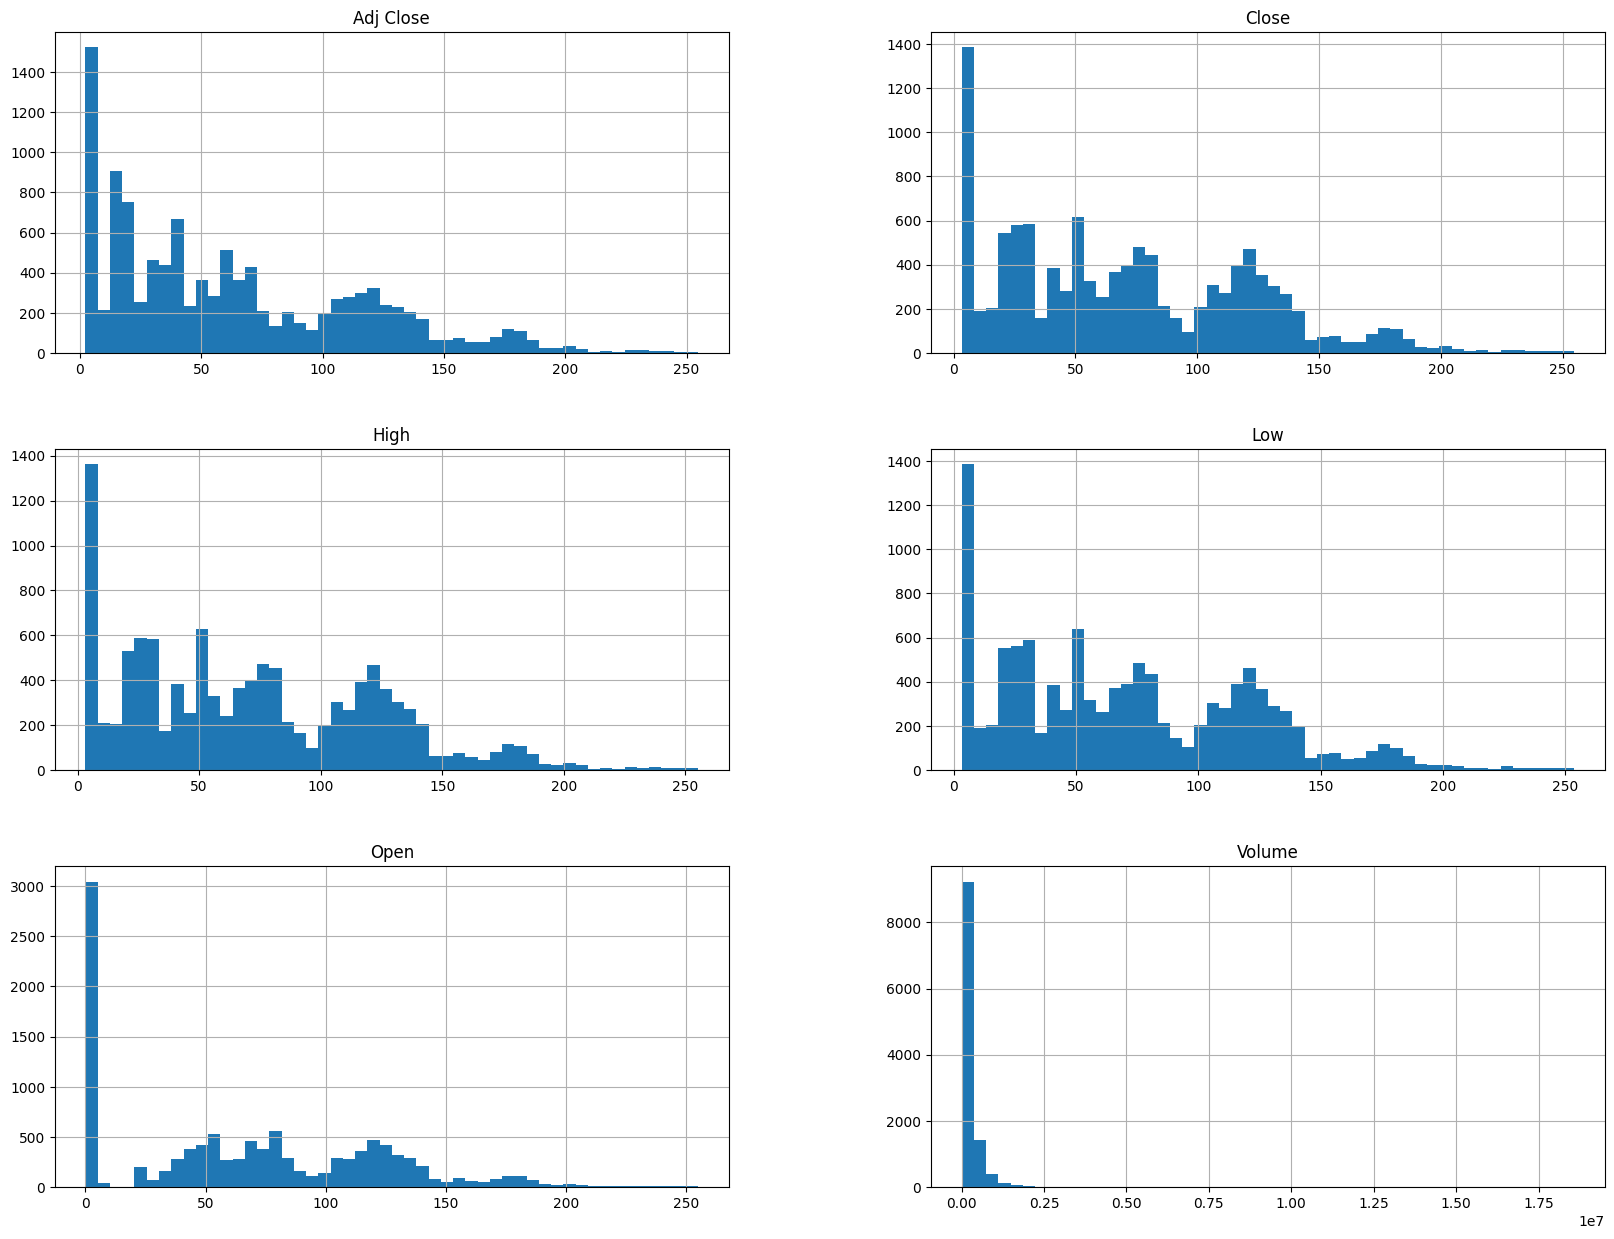

In [33]:
m.hist(bins=50, figsize=(20,15))

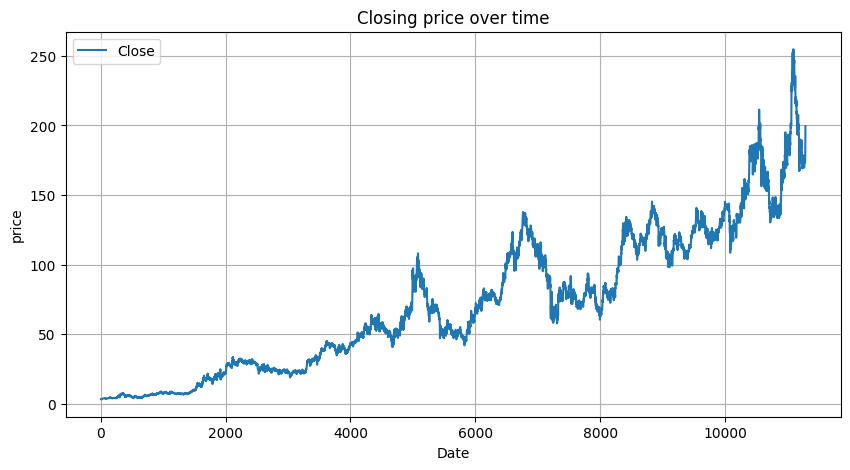

In [34]:
plt.figure(figsize=(10,5))
plt.plot(m.index, m['Close'], label='Close')
plt.title('Closing price over time')
plt.xlabel('Date')
plt.ylabel('price')
plt.legend()
plt.grid()
plt.show()

***Create a Test Set***

In [35]:
from sklearn.model_selection import train_test_split
train_set, test_set= train_test_split(m, test_size=0.2, random_state=42)

In [36]:
train_set.shape, test_set.shape

((9032, 7), (2259, 7))

***Stratified Split***

In [37]:
m['Cost']=pd.cut(m['Close'],
                 bins=[0, 25, 50, 75, 100, 125, np.inf],
                 labels=[1,2,3,4,5,6])

<Axes: >

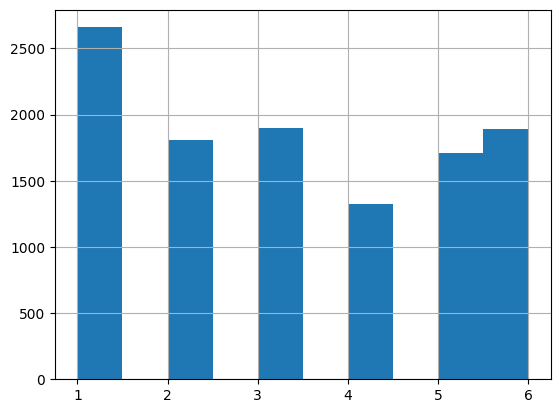

In [38]:
m['Cost'].hist()

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(m, m['Cost']):
  strat_train_set=m.loc[train_index]
  strat_test_set=m.loc[test_index]

In [40]:
m['Cost'].value_counts()/len(m)

,count
Cost,
1,0.235586
3,0.167921
6,0.167479
2,0.160216
5,0.151271
4,0.117527


In [41]:
strat_train_set['Cost'].value_counts()/len(strat_train_set)

,count
Cost,
1,0.235607
3,0.167958
6,0.167516
2,0.160208
5,0.151240
4,0.117471


In [42]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop('Cost', axis=1, inplace=True)

***Visualizing Geographical Data***

In [43]:
m=strat_train_set.copy()

<Axes: xlabel='High', ylabel='Close'>

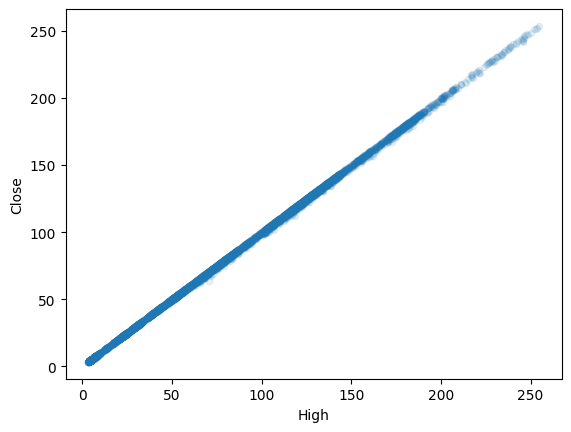

In [44]:
m.plot(kind="scatter", x='High', y='Close', alpha=0.1)

***Looking for Correlations***

In [45]:
numerical_features = m.select_dtypes(include=np.number).columns
corr_matrix = m[numerical_features].corr()
corr_matrix['Close'].sort_values(ascending=False)

,Close
Close,1.000000
High,0.999954
Low,0.999953
Adj Close,0.991384
Open,0.991141
Volume,0.296874


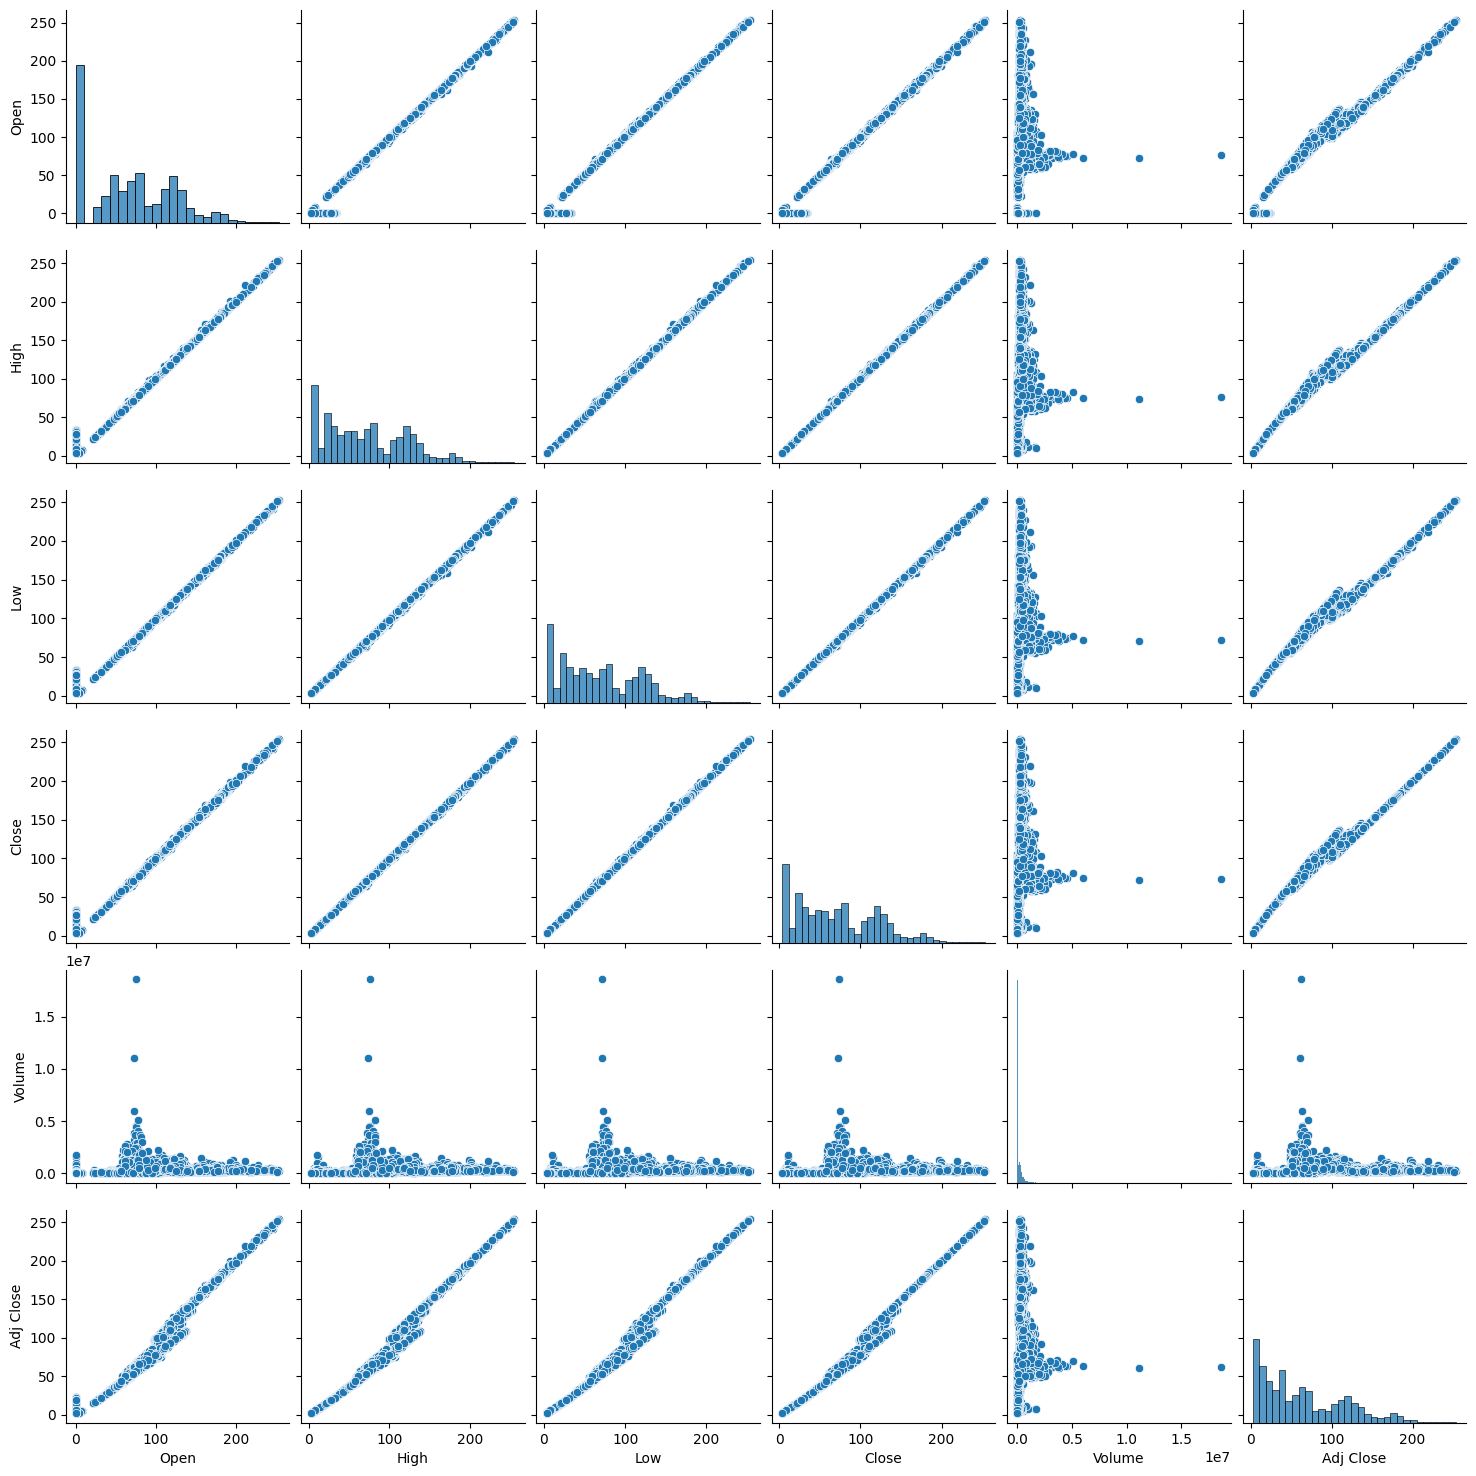

In [46]:
Attributes=['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
sns.pairplot(m[Attributes])

***Experimenting with Attribute Combinations***

In [47]:
m['ma_7']=m['Adj Close'].rolling(window=7).mean()
m['ma_30']=m['Adj Close'].rolling(window=30).mean()

m['pct_change']=m['Adj Close'].pct_change()*100

m['volatility']=m['Adj Close'].rolling(window=7).std()

<ipython-input-47-3fa18bf1fe63>:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  m['pct_change']=m['Adj Close'].pct_change()*100


In [48]:
m['Date']=pd.to_datetime(m['Date'])
m.set_index('Date', inplace=True)

In [49]:
corr_matrix = m.corr()
corr_matrix['Close'].sort_values(ascending=False)

,Close
Close,1.000000
High,0.999954
Low,0.999953
Adj Close,0.991384
Open,0.991141
ma_7,0.373613
pct_change,0.373173
Volume,0.296874
volatility,0.192774
ma_30,0.179823


***Prepare the Data for Machine Learning Algorithms***

In [50]:
m=strat_train_set.drop('Close', axis=1)
m_labels=strat_train_set['Close'].copy()

In [51]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')


In [52]:
m_num=m.drop('Date', axis=1)

In [53]:
imputer.fit(m_num)

SimpleImputer(strategy='median')

In [54]:
imputer.statistics_

array([5.07140732e+01, 6.67500000e+01, 6.55000000e+01, 6.60149994e+01,
       8.96000000e+04])

In [55]:
m_num.median().values

array([5.07140732e+01, 6.67500000e+01, 6.55000000e+01, 6.60149994e+01,
       8.96000000e+04])

In [56]:
z=imputer.transform(m_num)

In [57]:
m_tr=pd.DataFrame(z, columns=m_num.columns, index=m_num.index)

In [58]:
m_tr.head()

,Adj Close,High,Low,Open,Volume
5402,49.399746,66.500000,66.000000,66.099998,16700.0
1995,15.039680,21.832424,21.551319,0.000000,16409.0
7225,63.513668,76.699997,73.500000,75.559998,1091700.0
4028,31.392050,43.500000,43.250000,43.500000,26100.0
5575,42.578537,56.599998,55.549999,55.549999,89200.0


***Handling Text and Categorical Attributes***

In [59]:
m_cat=m[['Date']]
m_cat.head(10)

,Date
5402,8/1/2001
1995,2/5/1988
7225,10/31/2008
4028,2/21/1996
5575,4/16/2002
9586,3/21/2018
2397,9/8/1989
3045,4/1/1992
1311,5/22/1985
5090,5/5/2000


In [60]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
m_cat_encoded=ordinal_encoder.fit_transform(m_cat)
m_cat_encoded[:10]

array([[7530.],
       [3552.],
       [1335.],
       [3310.],
       [4622.],
       [4015.],
       [8986.],
       [4453.],
       [5557.],
       [5848.]])

In [61]:
ordinal_encoder.categories_

[array(['1/10/1983', '1/10/1984', '1/10/1986', ..., '9/9/2019', '9/9/2020',
        '9/9/2021'], dtype=object)]

***Transformation pipelines***

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
                       ('imputer', SimpleImputer(strategy='median')),
                       ('std_scaler', StandardScaler()),
])
m_num_tr=num_pipeline.fit_transform(m_num)

In [63]:
from sklearn.compose import ColumnTransformer
num_attribs=list(m_num)
cat_attribs=['Date']

full_pipeline=ColumnTransformer([
                                 ('num', num_pipeline, num_attribs),
                                 ('cat', OrdinalEncoder(), cat_attribs),
])
m_prepared=full_pipeline.fit_transform(m)

In [64]:
m_prepared

array([[-2.71797476e-01, -1.16095599e-01, -1.10792903e-01,
        -3.34500170e-02, -5.00316505e-01,  7.53000000e+03],
       [-9.29571261e-01, -9.83452063e-01, -9.83516555e-01,
        -1.21826133e+00, -5.01053290e-01,  3.55200000e+03],
       [-1.60683861e-03,  8.19682792e-02,  3.64651764e-02,
         1.36116008e-01,  2.22148451e+00,  1.33500000e+03],
       ...,
       [-1.17011937e+00, -1.33751038e+00, -1.33705161e+00,
        -1.21826133e+00, -5.18943751e-01,  4.86200000e+03],
       [-8.53136597e-01, -8.71192300e-01, -8.71180102e-01,
        -1.21826133e+00, -4.62110014e-01,  1.37500000e+03],
       [-3.87243164e-01, -2.94741518e-01, -2.97319804e-01,
        -1.99251907e-01, -1.42811106e-01,  8.61200000e+03]])

In [65]:
m_prepared.shape

(9032, 6)

***Select and Train a Model***

In [66]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(m_prepared, m_labels)

LinearRegression()

In [67]:
some_data=m.iloc[:5]
some_labels=m_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)

In [68]:
print('Predictions:', lin_reg.predict(some_data_prepared))
print('Labels:', list(some_labels))

Predictions: [66.22739003 21.52328501 74.89714182 43.39574025 55.99087948]
Labels: [66.15000153, 21.55131912, 76.08999634, 43.375, 56.59999847]


In [69]:
from sklearn.metrics import mean_squared_error
m_predictions=lin_reg.predict(m_prepared)
lin_mse=mean_squared_error(m_labels, m_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

0.649879177461351

In [70]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(m_prepared, m_labels)

DecisionTreeRegressor()

In [71]:
m_predictions=tree_reg.predict(m_prepared)
tree_mse=mean_squared_error(m_labels, m_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

4.7995938314466e-16

***Better Evaluation Using Cross-Validation***

In [72]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg, m_prepared, m_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores=np.sqrt(-scores)

def display_scores(scores):
  print('Scores:', scores)
  print('Mean:', scores.mean())
  print('Standard deviation:', scores.std())

display_scores(tree_rmse_scores)

Scores: [0.42475009 1.30580246 1.44777402 0.45554458 0.39916733 0.4104925
 0.42340055 0.372656   0.46948157 0.50497918]
Mean: 0.6214048283584497
Standard deviation: 0.38066516236694053


In [73]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(m_prepared, m_labels)
m_predictions=forest_reg.predict(m_prepared)
forest_mse=mean_squared_error(m_labels, m_predictions)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

0.23603225062143135

In [74]:
forest_scores=cross_val_score(forest_reg, m_prepared, m_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.32402677 0.98455793 1.22507873 0.33864533 0.30905713 0.31476482
 0.73029524 0.73043464 0.33179011 0.32345747]
Mean: 0.5612108172186834
Standard deviation: 0.31881639227470554


***Fine-Tune Using Grid Search***

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid=[
            {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
            {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg=RandomForestRegressor(random_state=42)
grid_search=GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(m_prepared, m_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [76]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 10}

In [77]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=10, random_state=42)

In [78]:
np.sqrt(-grid_search.best_score_)

0.5069433125822453

***Analyze the Best Models and Their Errors***

In [79]:
feature_importances =grid_search.best_estimator_.feature_importances_
feature_importances

array([2.24914513e-01, 1.80330533e-01, 3.70914688e-01, 2.17102530e-01,
       6.62272976e-03, 1.15007187e-04])

length of feature importances: 6
length of feature names: 10
updated featrue_name: ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'ma_7', 'ma_30', 'pct_change', 'volatility', 'extra_feature_1', 'extra_feature_2', 'extra_feature_3', 'extra_feature_4']


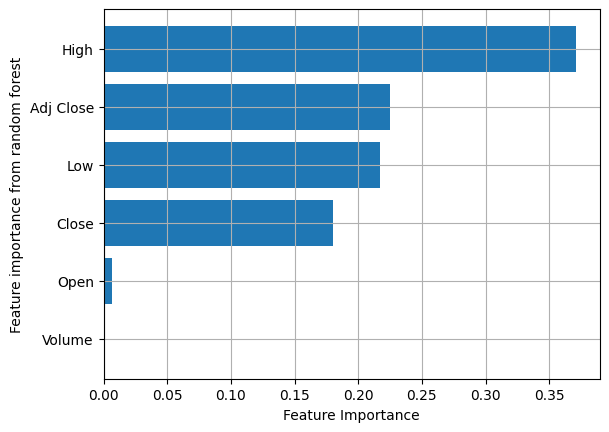

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

feature_names=['Adj Close','Close', 'High', 'Low', 'Open', 'Volume','ma_7','ma_30','pct_change','volatility']

print(f"length of feature importances: {len(feature_importances)}")
print(f"length of feature names: {len(feature_names)}")

feature_names.extend(['extra_feature_1', 'extra_feature_2','extra_feature_3','extra_feature_4'])

print(f"updated featrue_name: {feature_names}")

sorted_idx=feature_importances.argsort()

plt.barh(range(len(feature_importances)), feature_importances[sorted_idx])
plt.yticks(range(len(feature_importances)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature importance from random forest')
plt.grid()
plt.show()

***Evaluate System on the Test Set***

In [81]:
from sklearn.preprocessing import OrdinalEncoder

final_model=grid_search.best_estimator_
X_test=strat_test_set.drop('Close', axis=1)
y_test=strat_test_set['Close'].copy()


# Create the OrdinalEncoder with handle_unknown='use_encoded_value'
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Update the ColumnTransformer with the modified OrdinalEncoder
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', ordinal_encoder, cat_attribs),  # Use the modified encoder here
])

# Re-fit the pipeline
m_prepared = full_pipeline.fit_transform(m)

X_test_prepared=full_pipeline.transform(X_test)
final_predictions=final_model.predict(X_test_prepared)

final_mse=mean_squared_error(y_test, final_predictions)
final_rmse=np.sqrt(final_mse)

In [82]:
final_rmse

0.45869150401888087

***Save the Model***

In [85]:
import joblib
joblib.dump(final_model, 'my_model.pkl')

['my_model.pkl']